In [ ]:
"""
1: The Goal of the Dataset:
The goal of this dataset is to predict the likelihood of a patient experiencing a stroke
based on various health and demographic factors.
"""


In [2]:
"""
2: The Source of the Dataset:
Source: [Kaggle - Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)
"""
from google.colab import drive
drive.mount('/content/drive')

# Define the dataset path in your Google Drive
file_path = "/content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv"


Mounted at /content/drive


In [3]:
"""
3: General Information:
- Rows: Each row represents a single patient.
- Columns: Demographic and medical attributes.
- Target Variable: 'stroke' (0 = No, 1 = Yes)
"""

import pandas as pd

# Load dataset
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Loaded Successfully!\n")
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("Column Names:", df.columns.tolist(), "\n")
print("Data Types:")
print(df.dtypes)

# Display first 5 rows
df.head()


Dataset Loaded Successfully!

Number of Rows: 5110
Number of Columns: 12
Column Names: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'] 

Data Types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Missing Values per Column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64 

Statistical Summary:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


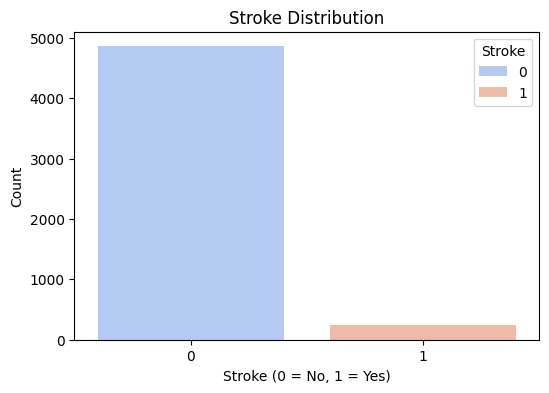

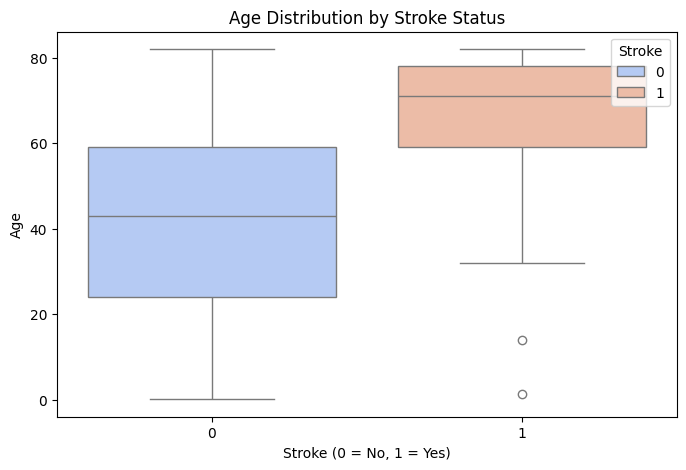

In [5]:
"4: Summary of the Dataset: "
# Check for missing values
missing_vals = df.isnull().sum()
print("Missing Values per Column:\n", missing_vals, "\n")

# Display statistical summary
print("Statistical Summary:")
display(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Stroke Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, hue='stroke', palette='coolwarm', dodge=False)
plt.title("Stroke Distribution")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Stroke", loc='upper right')
plt.show()

# Visualize Age Distribution by Stroke Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='age', data=df, hue='stroke', palette='coolwarm', dodge=False)
plt.title("Age Distribution by Stroke Status")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.legend(title="Stroke", loc='upper right')
plt.show()


In [7]:
"5: Preprocessing Techniques: "
# Handle missing values in 'bmi' column
df = df.copy()  # Ensure df is not a view of another DataFrame
df.loc[:, 'bmi'] = df['bmi'].fillna(df['bmi'].median())

# One-hot encoding categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize numeric variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Display processed data
df_encoded.head()

# Save the processed dataset
processed_file_path = "/content/drive/MyDrive/Dataset/processed_stroke_data.csv"
df_encoded.to_csv(processed_file_path, index=False)
print("Processed dataset saved at:", processed_file_path)


Processed dataset saved at: /content/drive/MyDrive/Dataset/processed_stroke_data.csv
